In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

In [8]:
df = pd.read_csv("data_sets/online_retail_sample.csv", index_col=False)
#df_clean = df.drop(df.columns[0], axis=1)
#df_clean.reset_index().head(5)
#df.reset_index(drop=True, inplace=True)
#Sample
#df1 = df.sample(frac =.2) 
#df1.reset_index().head(5)

In [9]:
df.shape

(108382, 10)

In [10]:
df.head(3)

Unnamed: 0  Unnamed: 0.1 InvoiceNo StockCode              Description  \
0      307822        307822    563928     20711          JUMBO BAG TOYS    
1      292597        292597    562558     23287  RED VINTAGE SPOT BEAKER   
2      135039        135039    547880     21421    PORCELAIN ROSE LARGE    

   Quantity    InvoiceDate  UnitPrice  CustomerID         Country  
0         2  8/21/11 15:17       2.08     17059.0  United Kingdom  
1         5   8/5/11 16:43       0.85     13451.0  United Kingdom  
2         6  3/27/11 16:05       1.25     15426.0  United Kingdom

In [13]:
# group by the Country
countries = df.groupby('Country').sum()

In [19]:
# sort the value and get the first 10 
countries.sort_values("Quantity", ascending=False).head(10)

Unnamed: 0  Unnamed: 0.1  Quantity  UnitPrice    CustomerID
Country                                                                     
United Kingdom  26812826078   26812826078    923175  459823.31  1.124928e+09
Netherlands       125014346     125014346     42873    1325.34  6.991673e+06
EIRE              476440575     476440575     29202    7690.95  2.236655e+07
Germany           496590181     496590181     23220    6902.40  2.357708e+07
France            503905254     503905254     22439    7135.95  2.244281e+07
Australia          49259173      49259173     14073     594.51  2.780204e+06
Sweden             28530190      28530190      8701     450.73  1.537687e+06
Switzerland       112430810     112430810      6872    1381.81  4.868252e+06
Spain             142287649     142287649      6181    2043.14  7.066979e+06
Japan              11522604      11522604      5112     132.23  8.802540e+05

In [21]:
# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]
countries

Unnamed: 0  Unnamed: 0.1  Quantity  UnitPrice  CustomerID
Country                                                               
EIRE          476440575     476440575     29202    7690.95  22366552.0
Germany       496590181     496590181     23220    6902.40  23577078.0
France        503905254     503905254     22439    7135.95  22442809.0
Australia      49259173      49259173     14073     594.51   2780204.0
Sweden         28530190      28530190      8701     450.73   1537687.0
Switzerland   112430810     112430810      6872    1381.81   4868252.0
Spain         142287649     142287649      6181    2043.14   7066979.0
Japan          11522604      11522604      5112     132.23    880254.0
Norway         74226377      74226377      4590    1634.88   2910207.0

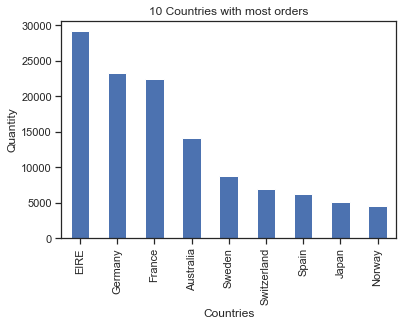

In [22]:
# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

#### Exclude negative Quatity entries

In [23]:
df = df[df.Quantity > 0]
df.head()

Unnamed: 0  Unnamed: 0.1 InvoiceNo StockCode  \
0      307822        307822    563928     20711   
1      292597        292597    562558     23287   
2      135039        135039    547880     21421   
3      316133        316133    564747     21670   
4       36441         36441    539451    85231B   

                     Description  Quantity     InvoiceDate  UnitPrice  \
0                JUMBO BAG TOYS          2   8/21/11 15:17       2.08   
1        RED VINTAGE SPOT BEAKER         5    8/5/11 16:43       0.85   
2          PORCELAIN ROSE LARGE          6   3/27/11 16:05       1.25   
3  BLUE SPOT CERAMIC DRAWER KNOB         6   8/28/11 16:09       1.25   
4     CINAMMON SET OF 9 T-LIGHTS         1  12/17/10 16:59       1.66   

   CustomerID         Country  
0     17059.0  United Kingdom  
1     13451.0  United Kingdom  
2     15426.0  United Kingdom  
3     14869.0  United Kingdom  
4         NaN  United Kingdom

#### Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries¶

In [24]:
# groupby CustomerID
customers = df.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

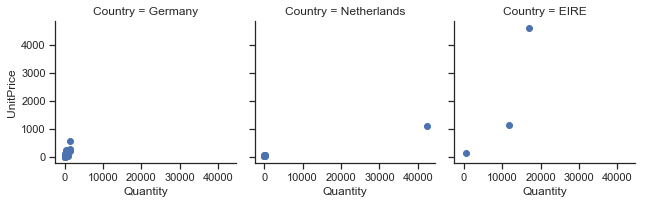

In [25]:
#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()